In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("data/Aviation_Data.csv", low_memory=False)

In [3]:
#sanity check might not need, to keep clear and concise can also use df.info()
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
print(df.duplicated().sum())

1390


In [5]:
new_df = df.drop_duplicates(ignore_index=False)

In [6]:
print(new_df.duplicated().sum())

0


In [7]:
new_df['Purpose.of.flight'].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [8]:
##new_df = new_df.loc[(new_df['Investigation.Type'] == 'Accident') 
                   #& (new_df['Country'] == 'United States')
                    #& (new_df['Event.Date'] > '2001-11-01')
                    #& (new_df['Aircraft.Category'] != ['Helicopter', 'Glider', 'Balloon', 
                                                       #'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 
                                                       #'Ultralight', 'WSFT', 'Powered-Lift', 'Blimp', 'ULTR', 
                                                       #'Rocket'])
                    #& (new_df['Purpose.of.flight'] != ['Instructional', 'Aerial Application', 'Positioning', 
                                                       #'Ferry', 'Aerial Observation', 'Flight Test', 'Skydiving', 
                                                       #'External Load', 'Banner Tow', 'Air Race show', 
                                                       #'Air Race/show', 'Glider Tow', 'Firefighting', 'Air Drop', 
                                                       #'ASHO'])]

In [9]:
new_df = new_df.loc[(new_df['Investigation.Type'] == 'Accident') 
                   & (new_df['Country'] == 'United States')
                    & (new_df['Event.Date'] > '2001-11-01')
                    & (new_df['Aircraft.Category'] != 'Helicopter')
                    & (new_df['Aircraft.Category'] != 'Glider')
                    & (new_df['Aircraft.Category'] != 'Balloon')
                    & (new_df['Aircraft.Category'] != 'Gyrocraft')
                    & (new_df['Aircraft.Category'] != 'Weight-Shift')
                    & (new_df['Aircraft.Category'] != 'Powered Parachute')
                    & (new_df['Aircraft.Category'] != 'Ultralight')
                    & (new_df['Aircraft.Category'] != 'WSFT')
                    & (new_df['Aircraft.Category'] != 'Powered-Lift')
                    & (new_df['Aircraft.Category'] != 'Blimp')
                    & (new_df['Aircraft.Category'] != 'ULTR')
                    & (new_df['Aircraft.Category'] != 'Rocket')
                    
                    & (new_df['Purpose.of.flight'] != 'Instructional')
                    & (new_df['Purpose.of.flight'] != 'Aerial Application')
                    & (new_df['Purpose.of.flight'] != 'Positioning')
                    & (new_df['Purpose.of.flight'] != 'Ferry')
                    & (new_df['Purpose.of.flight'] != 'Aerial Observation')
                    & (new_df['Purpose.of.flight'] != 'Flight Test')
                    & (new_df['Purpose.of.flight'] != 'Skydiving')
                    & (new_df['Purpose.of.flight'] != 'External Load')
                    & (new_df['Purpose.of.flight'] != 'Banner Tow')
                    & (new_df['Purpose.of.flight'] != 'Air Race show')
                    & (new_df['Purpose.of.flight'] != 'Air Race/show') 
                    & (new_df['Purpose.of.flight'] != 'Glider Tow')
                    & (new_df['Purpose.of.flight'] != 'Firefighting') 
                    & (new_df['Purpose.of.flight'] != 'Air Drop') 
                    & (new_df['Purpose.of.flight'] != 'ASHO')  ]

# this is the filter cell for the main dataset
# write aircraft category and purpose of flight lines of code as one long line for each

In [10]:
new_df = new_df.dropna(subset=['Make'])

In [11]:
new_df['Make'] = new_df['Make'].str.title()

In [12]:
new_df['Make'].value_counts()

Cessna           6091
Piper            3720
Beech            1470
Mooney            434
Boeing            378
                 ... 
Adler               1
Hoover              1
Rankin              1
Bilgri              1
Dietrich Ryan       1
Name: Make, Length: 3781, dtype: int64

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21429 entries, 51711 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                21429 non-null  object 
 1   Investigation.Type      21429 non-null  object 
 2   Accident.Number         21429 non-null  object 
 3   Event.Date              21429 non-null  object 
 4   Location                21422 non-null  object 
 5   Country                 21429 non-null  object 
 6   Latitude                20954 non-null  object 
 7   Longitude               20946 non-null  object 
 8   Airport.Code            14972 non-null  object 
 9   Airport.Name            15083 non-null  object 
 10  Injury.Severity         21383 non-null  object 
 11  Aircraft.damage         21028 non-null  object 
 12  Aircraft.Category       15725 non-null  object 
 13  Registration.Number     21428 non-null  object 
 14  Make                    21429 non-

In [14]:
sum(new_df['Model'].isna())

3

In [15]:
new_df = new_df.dropna(subset=['Model'])

In [16]:
##Karina complete this cell 
new_df = new_df.drop('Injury.Severity', axis =1)
new_df = new_df.drop('Registration.Number', axis =1)
new_df = new_df.drop('Amateur.Built', axis =1)
new_df = new_df.drop('FAR.Description', axis =1)
new_df = new_df.drop('Schedule', axis =1)
new_df = new_df.drop('Air.carrier', axis =1)
new_df = new_df.drop('Weather.Condition', axis =1)
new_df = new_df.drop('Report.Status', axis =1)
new_df = new_df.drop('Publication.Date', axis =1)
new_df = new_df.drop('Total.Fatal.Injuries', axis =1)
new_df = new_df.drop('Total.Serious.Injuries', axis =1)
new_df = new_df.drop('Total.Minor.Injuries', axis =1)
new_df = new_df.drop('Total.Uninjured', axis =1)
new_df = new_df.drop('Latitude', axis =1)
new_df = new_df.drop('Longitude', axis =1)
new_df = new_df.drop('Airport.Code', axis =1)
new_df = new_df.drop('Airport.Name', axis =1)

## makke concise with for loop

In [17]:
new_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Broad.phase.of.flight
51711,20011120X02265,Accident,SEA02LA010,2001-11-02,"ONTARIO, OR",United States,Substantial,NaN,Fetherolf,Hatz CB-1,1.0,Reciprocating,Personal,Landing
51712,20011114X02238,Accident,NYC02LA024,2001-11-02,"ARGYLE, NY",United States,Substantial,NaN,Cessna,172D,1.0,Reciprocating,Personal,Maneuvering
51713,20011106X02198,Accident,CHI02LA018,2001-11-02,"PEORIA, IL",United States,Substantial,NaN,Piper,PA-28R-201T,1.0,Reciprocating,Personal,Landing
51715,20011125X02293,Accident,NYC02LA031,2001-11-03,"NORTH LIMA, OH",United States,Substantial,NaN,Maule,M7-260,1.0,Reciprocating,Personal,Landing
51716,20011228X02462,Accident,NYC02LA021,2001-11-03,"ROANOKE, VA",United States,Substantial,NaN,Piper,PA-22-108,1.0,Reciprocating,Personal,Climb


In [18]:
new_df['Number.of.Engines'].value_counts().sort_index()

0.0       76
1.0    18236
2.0     2474
3.0       31
4.0       32
Name: Number.of.Engines, dtype: int64

''

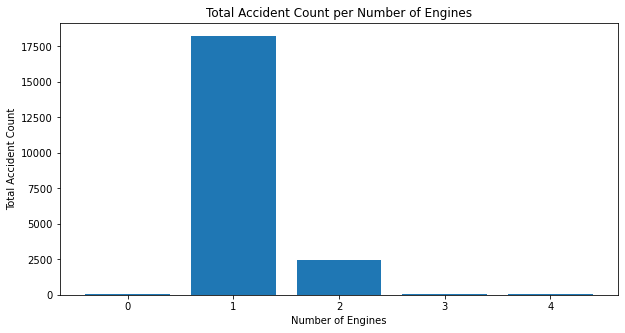

In [19]:
## Karina: make a visual on # of engines vs # of accidents 

fig, ax = plt.subplots(figsize=(10,5))

x = new_df['Number.of.Engines'].value_counts().index
y = new_df['Number.of.Engines'].value_counts().values

ax.bar(x,y)
ax.set_title('Total Accident Count per Number of Engines')
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Total Accident Count')
;

## avoid airplanes with one engine since airplanes with at least two engines can 
##run on the other engine as a backup. The graph shows that airplanes with a singular 
##engine have the most amount of accidents.

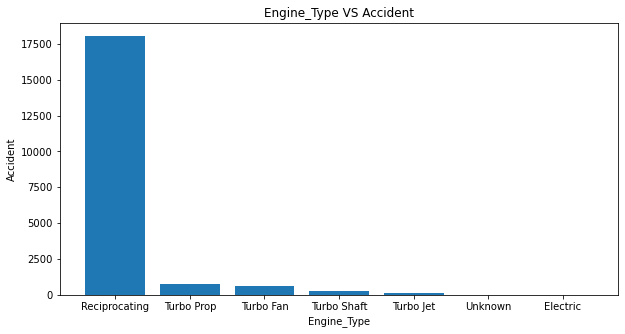

In [20]:
## Ermiyas: make a visual type of engine vs # of accidents

fig, ax = plt.subplots(figsize=(10,5))
x = new_df['Engine.Type'].value_counts().index
y = new_df['Engine.Type'].value_counts().values
ax.bar(x,y)
ax.set_title('Engine_Type VS Accident')
ax.set_xlabel('Engine_Type')
ax.set_ylabel('Accident');

## make title format consistent 
## avoid airplanes with reciprocating engine because the graph shows that 
## airplanes with this type of engine have the most amount of accidents.

In [21]:
new_df[['Number.of.Engines', 'Engine.Type']].value_counts()
## this is proof via rationalization

Number.of.Engines  Engine.Type  
1.0                Reciprocating    16507
2.0                Reciprocating     1260
                   Turbo Fan          532
                   Turbo Prop         377
1.0                Turbo Prop         350
                   Turbo Shaft        227
2.0                Turbo Jet           80
1.0                Turbo Jet           36
2.0                Turbo Shaft         34
3.0                Turbo Fan           23
4.0                Turbo Fan           20
1.0                Unknown             13
                   Turbo Fan           12
4.0                Reciprocating        6
3.0                Turbo Jet            4
2.0                Unknown              3
1.0                Electric             1
4.0                Turbo Prop           1
                   Turbo Jet            1
3.0                Reciprocating        1
4.0                Electric             1
0.0                Unknown              1
dtype: int64

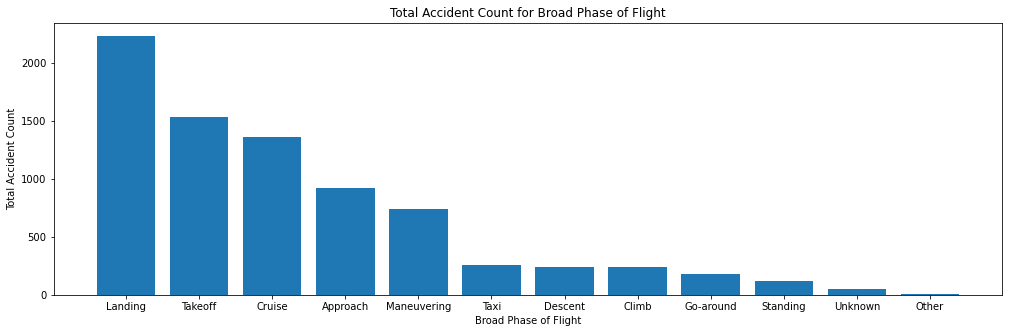

In [22]:
## Sangwon: make a visual for broad phase of flights vs # of accidents
fig, ax = plt.subplots(figsize=(17,5))

x = new_df['Broad.phase.of.flight'].value_counts().index
y = new_df['Broad.phase.of.flight'].value_counts().values

ax.bar(x,y)
ax.set_title('Total Accident Count for Broad Phase of Flight')
ax.set_xlabel('Broad Phase of Flight')
ax.set_ylabel('Total Accident Count');

#### avoid airplanes with broad phase of flight landing because the graph shows that 
## that's when the most amount of accidents occurred.

In [23]:
new_df['Make'].replace(to_replace = ['Saab-Scania', 'Saab'], value = 'Saab-Scania Ab (Saab)', inplace = True)
new_df['Make'].replace(to_replace = ['Embraer'], value = 'Embraer S A', inplace = True)
new_df['Make'].replace(to_replace = ['Airbus'], value = 'Airbus Industrie', inplace = True)
new_df['Make'].replace(to_replace = ['Bombardier', 'Bombardier, Inc.'], value = 'Bombardier Inc', inplace = True)
new_df['Make'].replace(to_replace = ['Mcdonnell Douglas', 'Douglas', 'Mcdonnell Douglas Corporation'], value = 'Mcdonnell Douglas Aircraft Co', inplace = True)
new_df['Make'].replace(to_replace = ['Beechcraft'], value = 'Beech', inplace = True)
new_df['Make'].replace(to_replace = ['Gulfstream'], value = 'Gulfstream Aerospace', inplace = True)
new_df['Make'].replace(to_replace = ['Embraer-Empresa Brasileira De'], value = 'Embraer S A', inplace = True)

In [24]:
new_df['Purpose.of.flight'].replace(to_replace = ['PUBS'], value = 'Public Aircraft - State', inplace = True)
new_df['Purpose.of.flight'].replace(to_replace = ['PUBL'], value = 'Public Aircraft - Local', inplace = True)

In [25]:
## Ermiyas: use groupby for make/model and # of accidents using 'Total.Injuries' and value sort
filtered_public_df = new_df.loc[(new_df['Number.of.Engines'] > 2.0)
           & (new_df['Engine.Type'] != 'Reciprocating')
           & (new_df['Purpose.of.flight'] != 'Personal')
           & (new_df['Purpose.of.flight'] != 'Business')
           & (new_df['Purpose.of.flight'] != 'Other Work Use')
           & (new_df['Purpose.of.flight'] != 'Executive/corporate')
           & (new_df['Broad.phase.of.flight'] != 'Landing')
           ]

## chose 2.0 engines, reference first bar graph regarding num of engines and accidents
## commercial planes are larger and require more engines.
## shorten

In [26]:
filtered_public_df[['Make', 'Number.of.Engines']].value_counts().head(50)

# Recc for commercial:
## chose make based off of top commercial manufacturers (Boeing & Airbus)
#1. Make: Airbus      2. Num of Engines: 4.0     

Make                           Number.of.Engines
Boeing                         4.0                  16
Mcdonnell Douglas Aircraft Co  3.0                  11
Boeing                         3.0                   9
Airbus Industrie               4.0                   3
Lockheed                       4.0                   2
Mcdonnell Douglas Aircraft Co  4.0                   1
Dassault                       3.0                   1
Antonov                        4.0                   1
dtype: int64

In [28]:
## another script for private recc:

filtered_private_df = new_df.loc[(new_df['Number.of.Engines'] > 1.0)
           & (new_df['Engine.Type'] != 'Reciprocating')
           & (new_df['Purpose.of.flight'] != 'Public Aircraft')
           & (new_df['Purpose.of.flight'] != 'Public Aircraft - Federal')
           & (new_df['Purpose.of.flight'] != 'Public Aircraft - State')
           & (new_df['Purpose.of.flight'] != 'Public Aircraft - Local')
           & (new_df['Broad.phase.of.flight'] != 'Landing')
           ]
## chose 1 bc we cant do more than two since private planes are smaller and do not need more engines. 

In [29]:
final_private_df = filtered_private_df.loc[(filtered_private_df['Make'] == 'Beech')
                       |(filtered_private_df['Make'] == 'Cessna')
                       |(filtered_private_df['Make'] == 'Bombardier Inc')
                       |(filtered_private_df['Make'] == 'Gulfstream Aerospace')
                        ]

## chose to focus on these brands bc theyre the top performing airplane manufactures

In [30]:
final_private_df[['Make', 'Number.of.Engines']].value_counts()
## private recc > Make: Gulfstream Aerospace  Num of Engines: 2.0  
## chose bc 

Make                  Number.of.Engines
Beech                 2.0                  151
Cessna                2.0                  133
Bombardier Inc        2.0                   62
Gulfstream Aerospace  2.0                   13
dtype: int64